## Section3. 분석 정보 시각표현하기 LAB01

### 정보 표현을 위한 그래픽 요소

시각화 도구를 이용하여 생성된 그래프나 차트는 인간의 눈을 통해 모양, 크기, 색, 위치
등의 패턴을 보게 되고 이를 뇌에서 해석한 뒤 학습

이 시지각 이론은 1900년대 초 독일의 심리학파인 게슈탈트
(Gestalt) 학파에 의해 활발하게 연구되었고, 시지각의 <b>게슈탈트 원리(The Gestalt
Principles of Visual Perception)</b>로 정립되었다.

### 게슈탈트 원리

<pre>
<font size=4 color="blue">
(1) 유사성의 법칙(Low of Similarity)
유사한 요소(형태, 색, 크기, 밝기)끼리 그룹 지어 하나의 패턴으로 보이게 함.

(2) 근접성의 법칙(Low of Proximity)
시공간적으로 서로 가까이 있는 것들을 함께 집단화하여 본다.

(3) 단순성의 법칙(Law of Simplicity)
주어진 조건으로 최대한 가장 단순한 쪽으로 인식한다.

(4) 연속성의 법칙(Law of Continuity)
요소들이 부드러운 연속을 따라 함께 묶여 지각된다.

(5) 폐쇄성의 법칙(Law of Closure)
기존의 지식을 토대로 완성되지 않은 형태를 완성해 간다.

</font>
</pre>

<img src="img/img01.png">

## (1) 유사성의 법칙(Low of Similarity)
###  유사한 요소(형태, 색, 크기, 밝기)끼리 그룹 지어 하나의 패턴으로 보이게 함.

<pre>
색이 가장 좋다.

[Usage]
scale_color_brewer(type = 'seq', palette = 1)

type :    색상에 사용되는 변수의 클래스입니다. 
          Sequential (seq) | Qualitative (qual) | Diverging (div)
palette : 사용할 색상 조합. 정수 또는 팔레트 이름이 될 수 있습니다.
          자세한 내용은 http://colorbrewer2.org/를 참조

다양한 scale_color_brewer
https://rstudio-pubs-static.s3.amazonaws.com/177286_826aed2f00794640b301aeb42533c6f1.html

</pre>

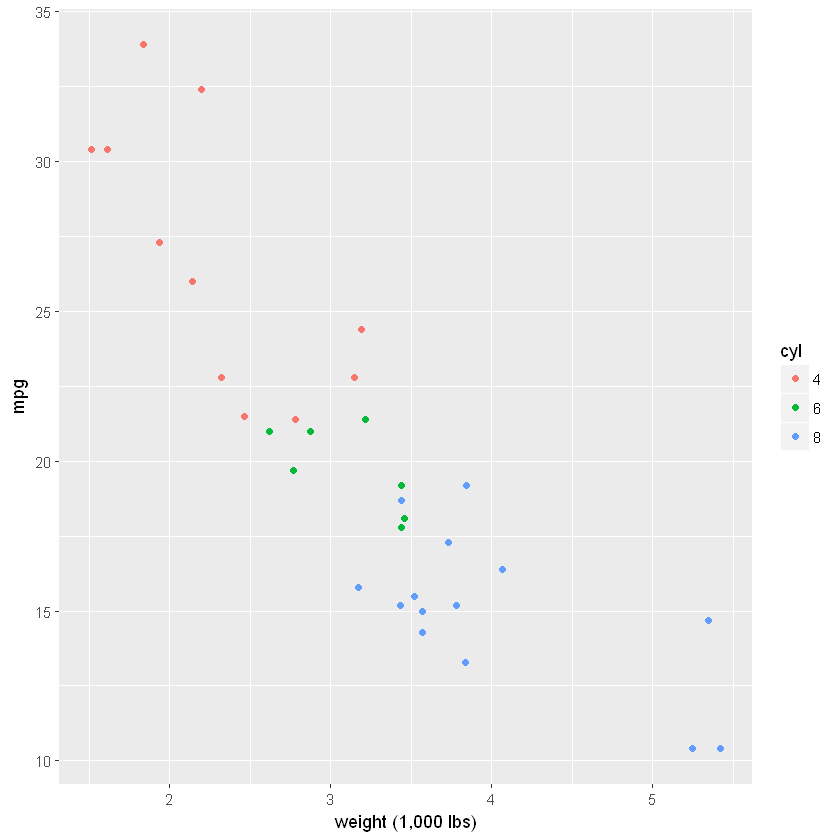

In [2]:
# Make number of cylinders a factor, so ggplot will choose a discrete scale.
library(ggplot2)
mtcars$cyl<-factor(mtcars$cyl)

ggplot(mtcars, aes(wt, mpg)) + 
          geom_point(aes(color=cyl)) + 
          xlab("weight (1,000 lbs)")

 *  유사한 요소끼리 그룹 지어 하나의 패턴으로 보이게 한다.

In [ ]:
ggplot(mtcars, aes(wt, mpg)) + 
          geom_point(aes(color=cyl)) + 
          xlab("weight (1,000 lbs)") +
          scale_color_brewer("Cylinders", type="seq", palette=1)

## (2) 근접성의 법칙(Low of Proximity)
### 시공간적으로 서로 가까이 있는 것들을 함께 집단화하여 본다.

### K-means 알고리즘에 의한 클러스터 분석을 수행해 보자.

### 군집분석(Cluster)
<pre>
(가) 군집분석은 비지도학습(Unsupervised learning) 분석 기법 중 하나.
(나) 사전 정보 없이 자료를 컴퓨터에게 주고 유사한 대상끼리 묶으라는 
     명령을 내리는 분석방법

K-means 군집 분석은? (거리를 이용)
01 분석자가 설정한 K개의 군집 중심점을 선정한다.
02 관측치가 거리상 가장 가까운 친구들을 군집화 시킨다.
...

</pre>

## 설명
<pre>
01 정규 분포를 따르는 난수 발생
02 주어진 데이터를 이용, 유사한 친구끼리 묶기
03 그래프로 시각화 해보기

matrix(rnorm(100, sd=0.3), ncol=2)   # 100개의 정규 분포 난수 발생(행렬 50,2로 만들기)

x : 데이터, centers = K개 그룹, iter.max : 반복 허용 횟수
kmeans(x,centers = 2, iter.max = 20)
</pre>

In [7]:
# 1부터 100가지 
# 평균은 0이고 표준편차는 0.3
# 컬럼은 2개의 컬럼.
dim( matrix(rnorm(100, mean=0, sd=0.3), ncol=2) )

[1] 50  2

In [9]:
x <- rbind(matrix(rnorm(100, mean=0, sd=0.3), ncol=2),
           matrix(rnorm(100, mean=1, sd=0.3), ncol=2))

dim(x); length(x)

[1] 100   2

[1] 200

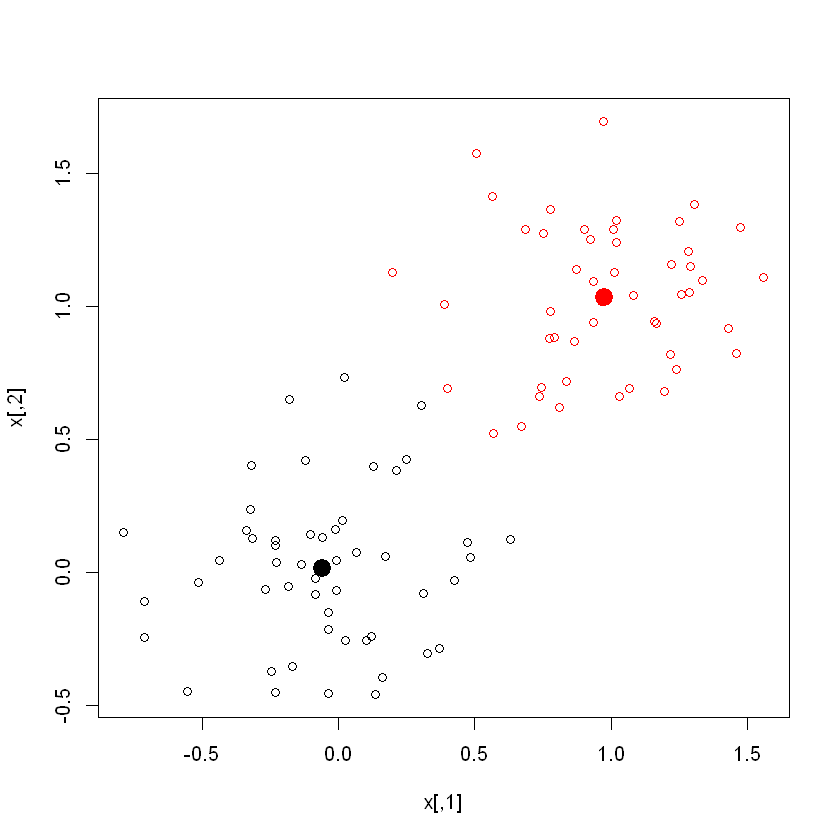

In [17]:
# iter.max : 반복의 허용 최대 횟수, 
# centers  : 중심점 2개 
cl <- kmeans(x,centers = 2, iter.max = 20)   
plot(x, col=cl$cluster)
points(cl$centers, col=1:2, pch=19, cex=2)

In [11]:
cl$cluster
cl$centers
names(cl)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

1,-0.05794024,0.01477599
2,0.97419569,1.03391203


[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

## 자크 베르탱(Jacques Bertin)의 그래픽 7요소

데이터나 정보들을 점, 선, 면, 영역, 입체 등의 <b>기하학 요소인 시각기호</b>로 그리고
이 시각기호를 색, 크기, 위치 등으로 장식하여, 양적, 질적 데이터의 비교,
관련성, 순서성 등을 인지할 수 있게 하는 시각적 표현 방법을 말함.

* 그래픽 7요소는 시각변수 7가지
    * 크기(size), 
    * 모양(shape), 
    * 밝기(lightness/value), 
    * 색(color), 
    * 방향(orientation), 
    * 질감(texture), 
    * 위치(location)를 말한다.


### (1) 크기(size)

기하적 요소들이 같은 크기를 가진 경우 상대적으로 하나만 작
게 표시하면 작게 표현한 것만이 눈에 띄게 , 그리고 또 클수록 시선이 주목된다.

### (2) 모양(shape)

<pre>
같은 모양 중 하나만 다른 모양이 있는 경우 다른 모양이 강조되어 눈에 띈다.
</pre>

### (3) 색(color)

<pre>
같은 색을 이용한 것 중에서 다른 색을 사용한 요소가 더 잘 보인다. 
</pre>

### (4) 밝기(명도 lightness/value)

<pre>
동일한 색에 대하여 동일한 수준의 밝기(명도)를 가진 요소 중 일부만 다른 밝기를 줄때 눈에 띄게 된다. 밝기의 높고 낮음은 색보다 오히려 명시성에 영향을 주다.
</pre>

### (5) 방향(orientation)

<pre>
하나만 다른 방향으로 기울이면 방향이 다른 요소에 시선이 끌리게 된다.
</pre>

### (6) 질감(texture)

<pre>
같은 색상과 모양이라도 질감을 다르게 준 것만 강조된다.
</pre>

### (7) 위치(location)

<pre>
위치를 다르게 함으로써 강조할 수 있다. 특정한 요소의 상대적인 위치를 확인하여
주변의 다른 요소와의 관계를 비교한다.
</pre>

<pre>
그래픽 7요소는 시각변수 7가지
크기(size), 
모양(shape), 
밝기(lightness/value), 
색(color), 
방향(orientation), 
질감(texture), 
위치(location)를 말한다.
</pre>

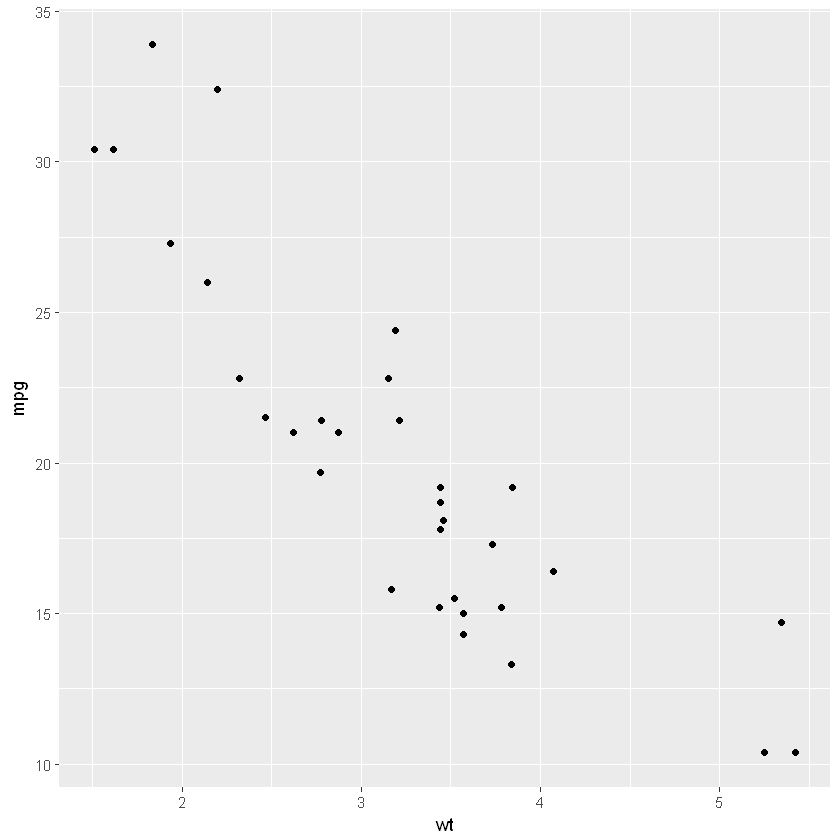

In [17]:
p <- ggplot(mtcars, aes(wt, mpg))
p + geom_point()

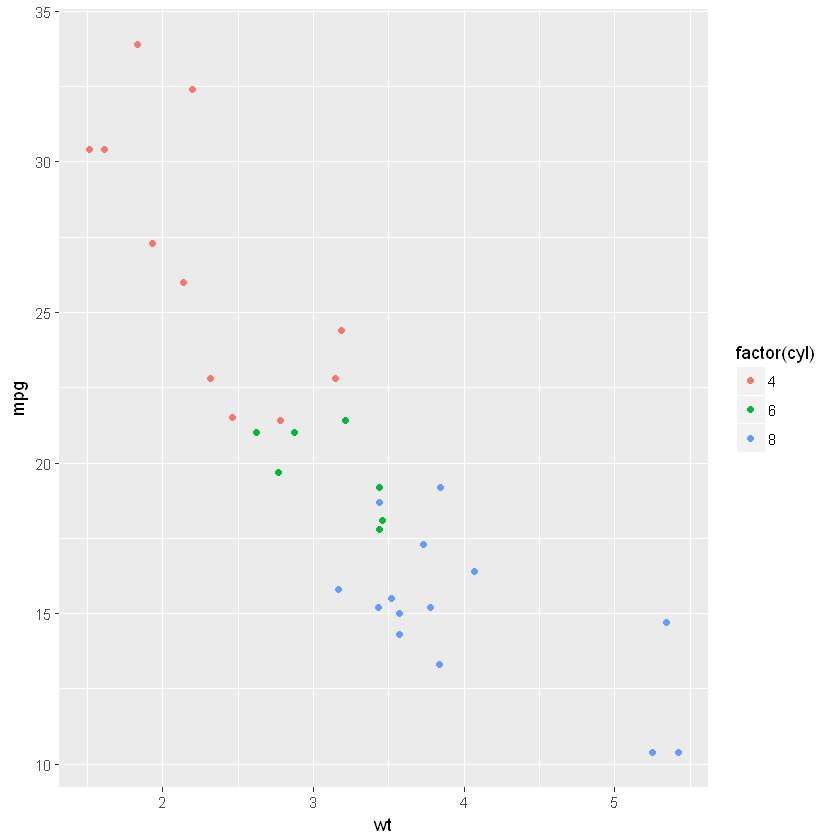

In [18]:
# 색(color), 

p + geom_point(aes(colour = factor(cyl)))

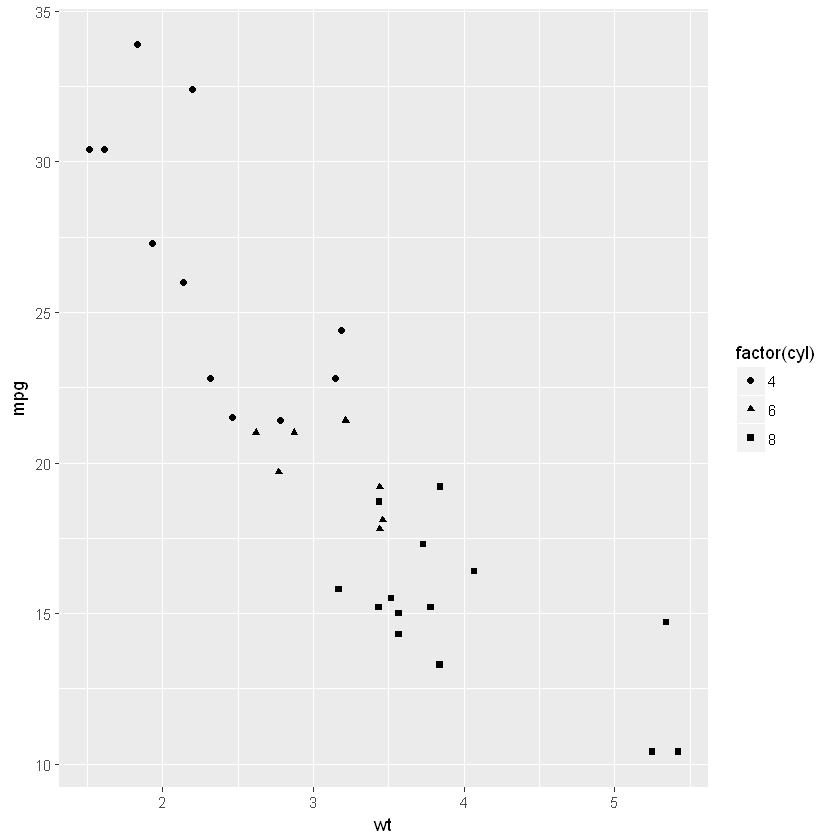

In [19]:
# 모양(shape), 
p + geom_point(aes(shape = factor(cyl)))

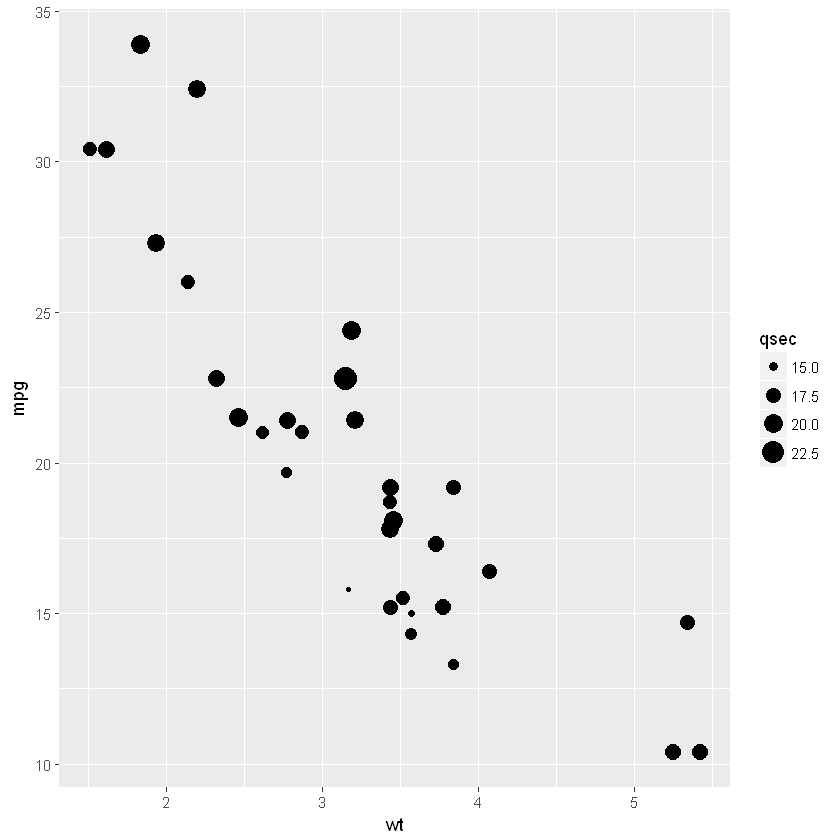

In [20]:
# 크기(size),

p + geom_point(aes(size = qsec))

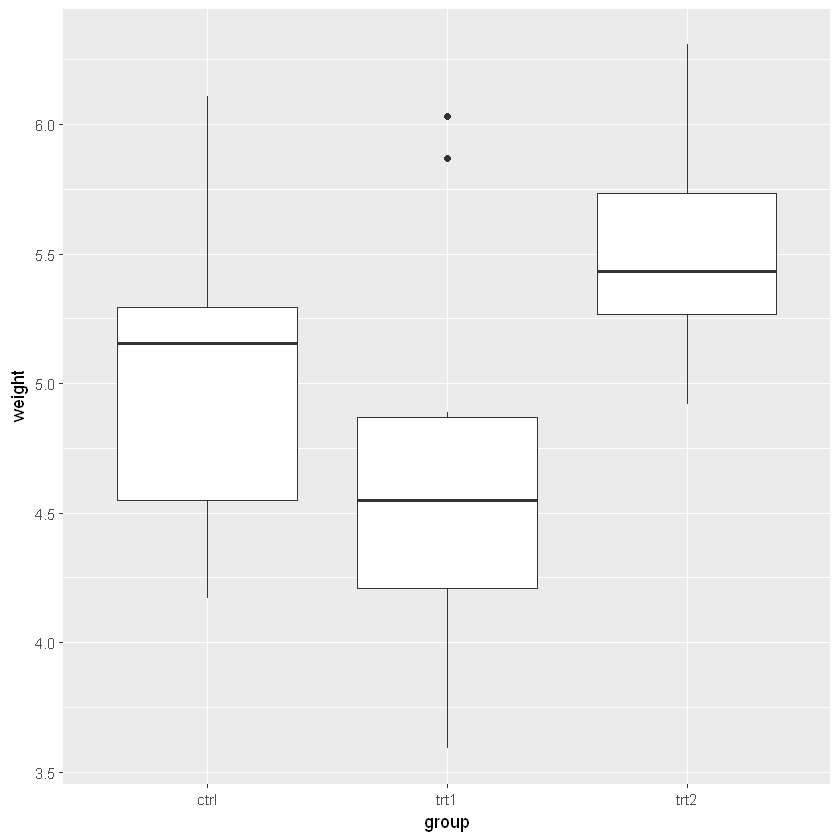

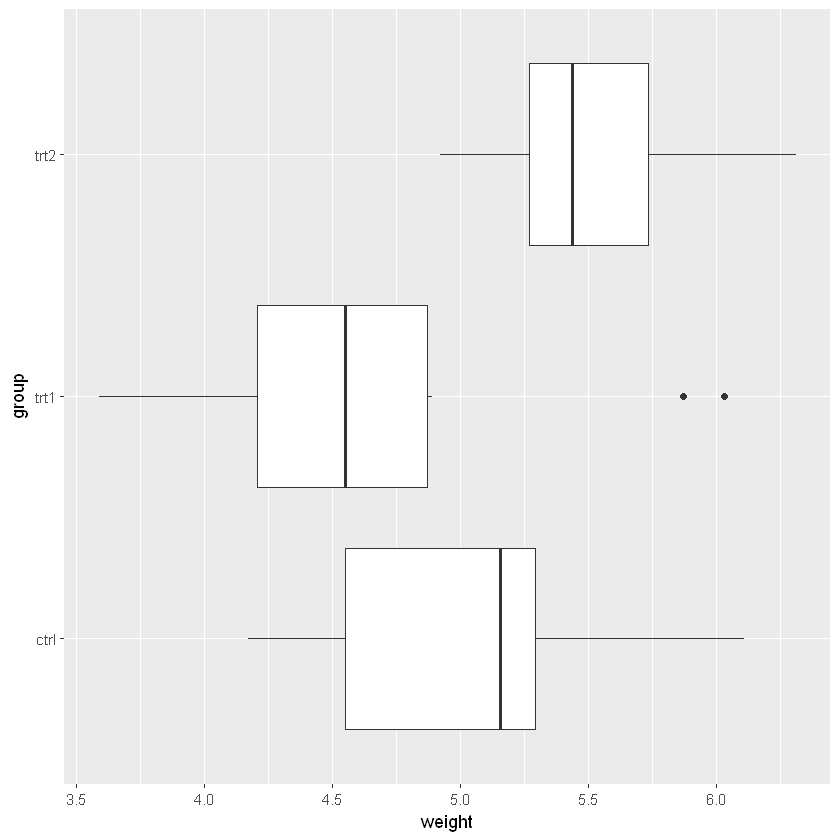

In [29]:
#방향(orientation), 
# coord_flip() : 수직이 수평, 수평이 수직이 되도록 좌표를 변경한다.

library(ggplot2)
# Basic box plot
bp <- ggplot(PlantGrowth, aes(x=group, y=weight))+
  geom_boxplot()
bp
# Horizontal box plot
bp + coord_flip()

<pre>
2 차원 커널 밀도 추정
지정된 범위에 걸쳐 커널 밀도 추정을 계산하고 래스터를 출력합니다.
</pre>

In [40]:
df <- data.frame(x=rnorm(100),y=rnorm(100))
k <- MASS:::kde2d(df$x,df$y)
k
str(k)

4.190153e-03,4.870558e-03,0.0049344534,0.0051438400,0.006546127,0.009703355,0.014119120,0.01828125,0.02072152,0.02127577,...,0.0242262880,0.0240004966,1.997508e-02,1.343644e-02,7.183046e-03,3.040385e-03,1.034466e-03,3.031421e-04,9.184092e-05,3.432582e-05
6.902591e-03,8.233439e-03,0.0087525970,0.0096026358,0.012175072,0.016977520,0.023056081,0.02839995,0.03152064,0.03278815,...,0.0352890376,0.0335323660,2.728807e-02,1.821109e-02,9.785915e-03,4.247343e-03,1.558531e-03,5.583284e-04,2.384983e-04,1.177712e-04
9.394385e-03,1.163271e-02,0.0132187642,0.0155833522,0.020154831,0.026995118,0.034465199,0.04023140,0.04334301,0.04523174,...,0.0482809370,0.0445449477,3.574149e-02,2.386995e-02,1.306167e-02,5.968450e-03,2.499049e-03,1.158536e-03,6.451795e-04,3.639960e-04
1.079000e-02,1.404602e-02,0.0173255260,0.0221553109,0.029610658,0.038955602,0.047714247,0.05335898,0.05581546,0.05787018,...,0.0628051717,0.0571702433,4.573278e-02,3.088345e-02,1.745943e-02,8.617398e-03,4.245523e-03,2.455452e-03,1.588598e-03,9.521470e-04
1.096841e-02,1.508414e-02,0.0202184525,0.0278226004,0.038429243,0.050507836,0.060859186,0.06675985,0.06876985,0.07068470,...,0.0776180296,0.0705227368,5.670227e-02,3.902347e-02,2.303795e-02,1.244051e-02,7.128828e-03,4.783390e-03,3.348614e-03,2.078770e-03
1.075156e-02,1.528088e-02,0.0216375451,0.0311673209,0.044041320,0.058414639,0.070847293,0.07838497,0.08141473,0.08364757,...,0.0900063214,0.0818524497,6.634673e-02,4.675391e-02,2.900417e-02,1.712110e-02,1.104184e-02,8.115283e-03,5.953297e-03,3.817369e-03
1.108604e-02,1.541902e-02,0.0217841142,0.0315666625,0.045023729,0.060700462,0.075574658,0.08649399,0.09270571,0.09643071,...,0.0965086935,0.0874143979,7.141337e-02,5.171766e-02,3.383843e-02,2.165253e-02,1.520700e-02,1.183268e-02,9.011862e-03,6.030273e-03
1.201387e-02,1.562165e-02,0.0209054220,0.0295281772,0.042262641,0.058520342,0.076094480,0.09165131,0.10265687,0.10890155,...,0.0953043476,0.0851512056,6.999383e-02,5.226370e-02,3.612581e-02,2.479539e-02,1.852442e-02,1.503590e-02,1.194075e-02,8.478777e-03
1.257350e-02,1.527587e-02,0.0192119733,0.0264873843,0.038542588,0.055613749,0.076150813,0.09651521,0.11234135,0.12103995,...,0.0883192291,0.0769726248,6.343830e-02,4.884530e-02,3.558092e-02,2.595270e-02,2.040881e-02,1.726943e-02,1.443138e-02,1.098971e-02
1.177725e-02,1.386765e-02,0.0171786578,0.0241957315,0.036793561,0.055530817,0.078956410,0.10297873,0.12193466,0.13177250,...,0.0805006280,0.0680406036,5.586755e-02,4.396547e-02,3.338434e-02,2.567955e-02,2.126888e-02,1.884478e-02,1.655676e-02,1.337112e-02
9.610826e-03,1.171795e-02,0.0156382446,0.0239252738,0.038348557,0.059131232,0.084434723,0.10984253,0.12931993,0.13854610,...,0.0762982179,0.0630942851,5.126037e-02,4.041271e-02,3.130189e-02,2.514756e-02,2.197329e-02,2.029882e-02,1.835877e-02,1.519480e-02


List of 3
 $ x: num [1:25] -1.88 -1.69 -1.5 -1.31 -1.12 ...
 $ y: num [1:25] -2.24 -2.04 -1.83 -1.63 -1.43 ...
 $ z: num [1:25, 1:25] 0.00419 0.0069 0.00939 0.01079 0.01097 ...


## 레벨 (등고선) 플롯 : filled.contour
<pre>
이 함수는 등고선 사이의 영역이 단색으로 채워진 등고선 플롯을 생성합니다

filled.contour(x = seq(0, 1, length.out = nrow(z)),
               y = seq(0, 1, length.out = ncol(z)),
               z,
               xlim = range(x, finite = TRUE),
               ylim = range(y, finite = TRUE),
               zlim = range(z, finite = TRUE),
               levels = pretty(zlim, nlevels), nlevels = 20,
               color.palette = cm.colors,
               col = color.palette(length(levels) - 1),
               plot.title, plot.axes, key.title, key.axes,
               asp = NA, xaxs = "i", yaxs = "i", las = 1,
               axes = TRUE, frame.plot = axes, …)
.filled.contour(x, y, z, levels, col)

</pre>

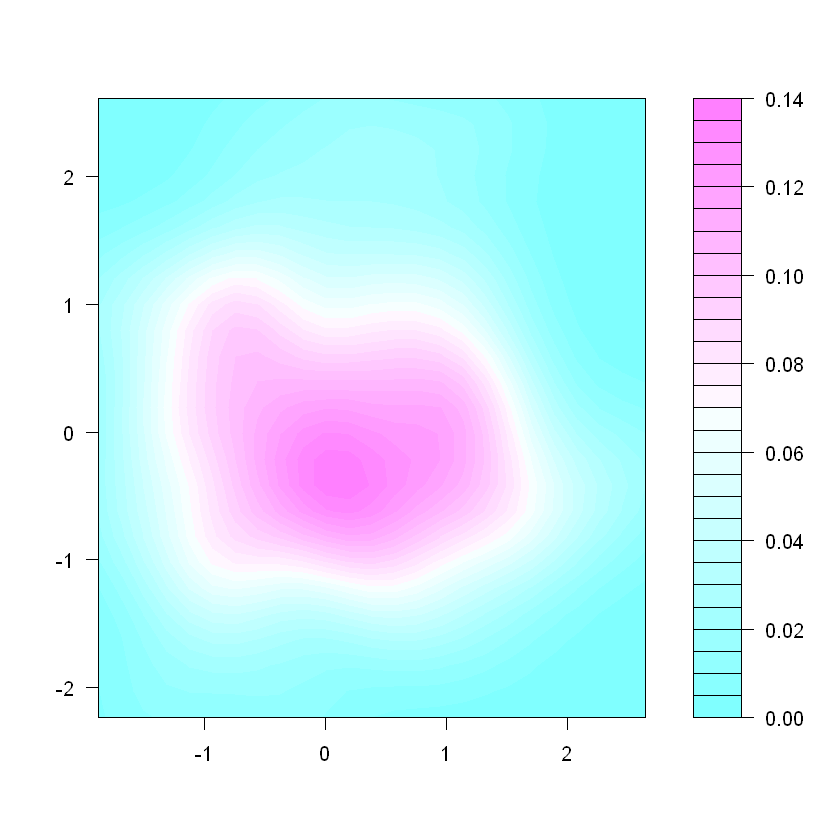

In [41]:
filled.contour(k)

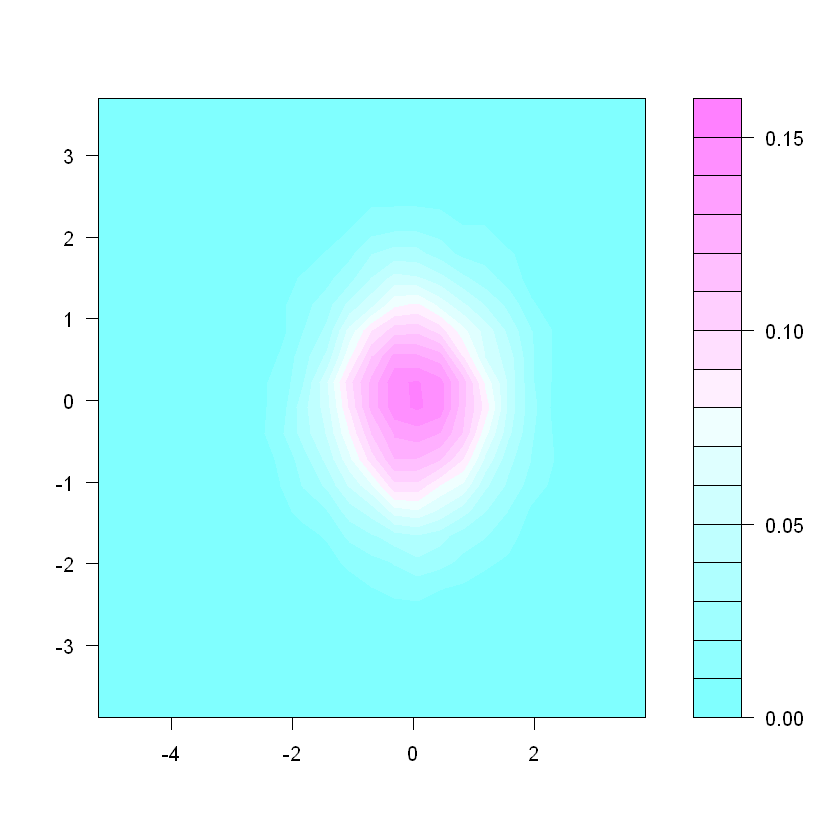

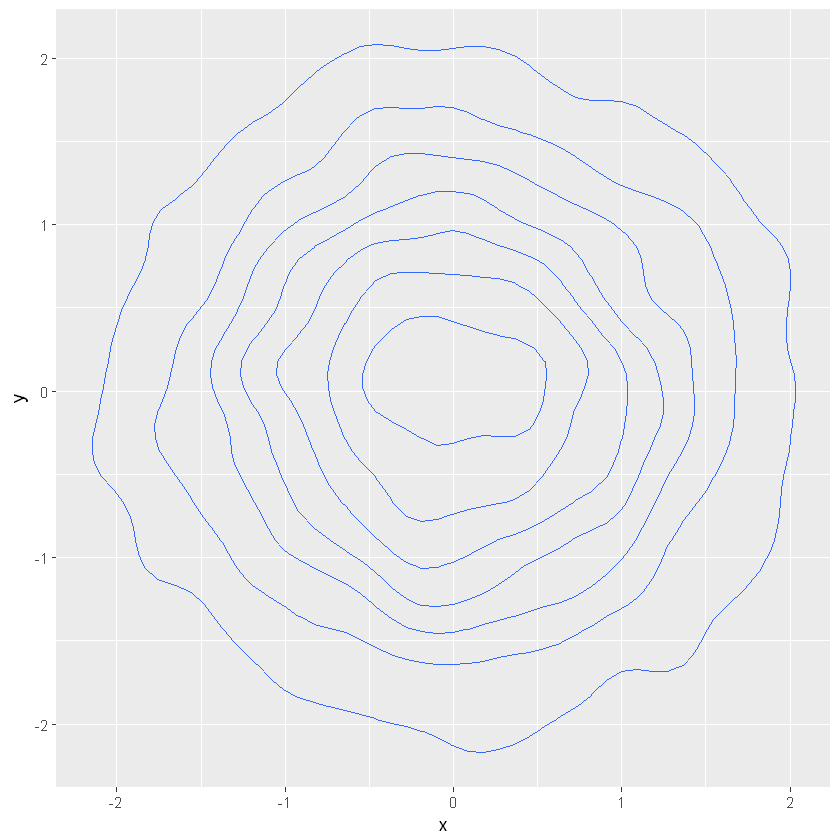

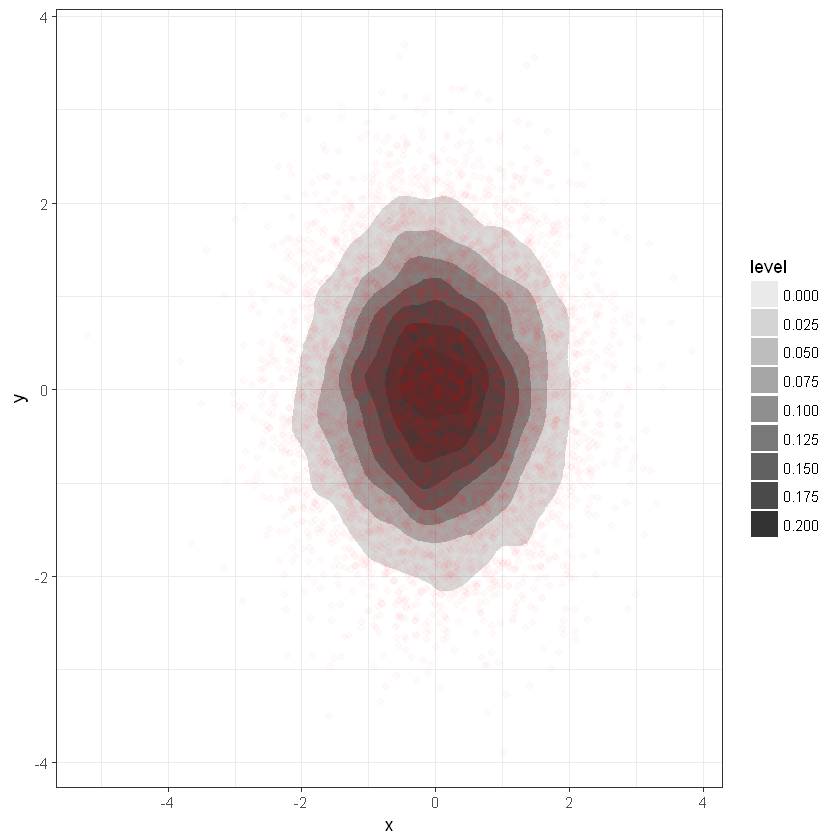

In [18]:
#밝기(lightness/value)
df <- data.frame(x=rnorm(10000),y=rnorm(10000))
k <- MASS:::kde2d(df$x,df$y)

filled.contour(k)

library(ggplot2)
ggplot(df,aes(x=x,y=y))+geom_density2d()

ggplot(df,aes(x=x,y=y))+
    stat_density2d(aes(alpha=..level..), geom="polygon") +
    scale_alpha_continuous(limits=c(0,0.2),breaks=seq(0,0.2,by=0.025))+
    geom_point(colour="red",alpha=0.02)+
    theme_bw()

## 그래픽 품질 향상을 위한 그래픽 디자인 원리

### 1. 타이포그래피(Typography)

### 2. 색상(Color)

### 3. 그리드(Grid)

### 4. 아이소타이프(ISOTYPE)

## 애드워드 튜페의 시각정보 디자인 7원칙

<pre>
<b>1. 시각적인 비교를 강화한다.</b>
   정보는 <b>비교</b>를 통해 사용자에게 더욱더 의미있게 된다. 
   관련된 변수와 추세를 비교할 수 있는 도구를 제시해야 한다. 
   
<b>2. 인과관계를 제시한다.</b>
   원인과 결과를 명확하게 제시해야 한다.

<b>3. 다차원 변수를 표시한다.</b>
   <b>관련 있는 여러개의 변수</b>를 이용하여 정보를 표현한다.

<b>4. 데이터, 텍스트, 그래픽을 한 화면에 효과적인 정보전달을 위해 어울리도록 배치한다.</b>
   <b> 범례와 레이블 </b>이 포함된 경우 정보 전달이 효과적이다.

<b>5. 콘텐츠의 질과 연관성, 진실성을 명확하게 한다.</b>
   시각화하려는 정보가 사용자의 목적을 달성하는데 유익한 것인가? 고민해야 한다.

<b>6. 시간적인 순서가 아니라 공간적인 순서로 배치한다.</b>
   시간보다는 공간에 따라 배치해야 한다. 사용자의 이해가 쉬워진다.

<b>7. 정량적 자료에 대한 양적 성질을 제거하지 말아야 한다.</b>
   그래프나 차트로 표현이 가능하다. 한눈에 양적인 정보를 파악할 수 있다.

</pre>

### 수행 내용 : 그래픽 품질 향상하기

<pre>
<b> 7가지 요소를 잘 표현하고 있는지 확인 </b>
1. 시각적 비교를 강화한다.
2. 인과관계를 제시한다.
3. 다차원 변수를 표시한다.
4. 텍스트, 그래픽, 데이터를 한 화면에 조화롭게 배치한다.
5. 콘텐츠의 질과 연관성, 진실성을 분명히 한다.
6. 시간 순서가 아닌 공간 순서로 나열한다.
7. 정량적 자료의 정량성을 제거하지 않는다.
</pre>

### 2. 그래프에서 정보 전달 효과를 높이기 위해 수정하거나 강조할 그래픽 요소를 선택하여 전달 요소를 강조한다.


<img src="img/img02.png">

### 3. 색과 모양을 이용하여 강조한다.

<img src="img/img03.png">

### 4. 밝기(명도 lightness/value)를 이용하여 전달 요소를 강조한다.

<img src="img/img04.png">

### 5. 질감을 이용하여 전달 요소를 강조한다.

<img src="img/img05.png">

## [3] 타이포그래피, 그리드, 색상, 아이소타이프 등의 그래픽 디자인 원리 적용

### 1. 타이포그래프 통해 그래프 품질 향상
<pre>
이 가이드 요소에 대한 서체, 글자의 무게,
크기, 색채, 스타일, 간격 등을 조정하여 그래프의 품질을 향상

이 막대 그래프에서 X축과, Y축의 축 제목, 데이터 값에 대한 레이블, 그래프
제목 등의 가이드 요소별로 서체와 글자 크기, 굵기가 다르다
</pre>

<b> 서체와 무게 </b>
<img src="img/img06.png">

<b> 크기와 색채 </b>
<img src="img/img07.png">

<b> 스타일과 간격 </b>
<b>  </b>

## 2. 색상을 통해 그래프 품질을 향상한다

<pre>
(1) 구분 표현
   정보를 분류하거나 묶기 위해 구분이 색상들을 선택하여 표현한다.
(2) 순서 표현
   정보의 순서 등 위계를 표현하는 경우 색의 채도나 색의 스펙트럼 변화를 이용한다.
   색상 팔레트를 활용하면 좀 더 쉽게 색상을 통한 순서상 표현을 할 수 있다,
(3) 비율 표현
   비율은 연속된 크기순으로 표시하되 0을 중심으로 명도를 단계별로 변화를 주어 표시
   하고, 위와 아래의 작은 수치들은 보색 대비가 되는 두 가지 색을 선택하여 사용한다.
   만약 회색을 기준 색으로 하여 0으로 두고 빨간색이 늘어나면 부정적이 수치가 증가
   하는 것이고, 녹색이 늘어나면 긍정적 수치가 증가하는 것으로 표현할 수 있다
</pre>

https://www.theguardian.com/news/datablog/2010/may/17/uk-public-spending-departments-money-cuts

<pre>
2008년과 2009년 공공 부문에 대한 영국 정부 비용을 부처별로 쪼개어 보여준 것이다.
즉, 정량적인 의미나 범주 구분을 위해 색상을 사용하지 않았다.
장식적인 기능으로 색상을 사용하여 매력적인 시각화로 만듬.
</pre>

## 3. 그리드를 통해 그래프 품질을 향상한다.

## <참조-Reference>

https://bioboot.github.io/bggn213_f17/class-material/08_draw_lecture_plots2/